In [49]:
import sys

sys.path.append("..")

In [50]:
from PIL import Image

from colorpalettes.from_image import k_means_palette
from colorpalettes.optimize import ColorsetOptimizationConfig, optimize_colorset

In [51]:
import requests

resp = requests.get("https://upload.wikimedia.org/wikipedia/en/2/27/Bliss_%28Windows_XP%29.png")
print(resp.headers)

{'date': 'Sat, 26 Jul 2025 19:16:27 GMT', 'etag': '2a04e1c1b6b47bb452de0c96647f4095', 'server': 'ATS/9.2.11', 'content-type': 'image/png', 'x-object-meta-sha1base36': '8mlbrnj9xbpx8zvtv02repllp7iyp91', 'last-modified': 'Tue, 01 Apr 2025 20:09:44 GMT', 'content-length': '109857', 'age': '62257', 'accept-ranges': 'bytes', 'x-cache': 'cp6004 hit, cp6003 hit/21', 'x-cache-status': 'hit-front', 'server-timing': 'cache;desc="hit-front", host;desc="cp6003"', 'strict-transport-security': 'max-age=106384710; includeSubDomains; preload', 'report-to': '{ "group": "wm_nel", "max_age": 604800, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'nel': '{ "report_to": "wm_nel", "max_age": 604800, "failure_fraction": 0.05, "success_fraction": 0.0}', 'x-client-ip': '176.244.40.159', 'x-content-type-options': 'nosniff', 'access-control-allow-origin': '*', 'access-control-expose-headers': 'A

In [52]:
from io import BytesIO

image = Image.open(BytesIO(resp.content))

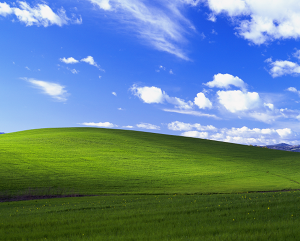

In [53]:
image

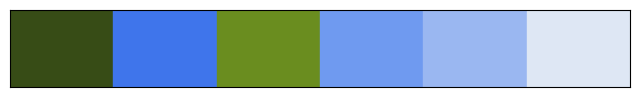

In [56]:
palette = k_means_palette(image, n_colors=6)

palette = palette.sorted_by_lightness()
palette.plot_colors();

/Users/njvh/Documents/Personal/colorpalettes/venv/lib/python3.13/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


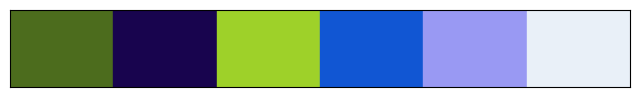

In [59]:
optimized = optimize_colorset(
    palette,
    config=ColorsetOptimizationConfig(
        saturation_valley=(70, 10),
        lightness_valley=(70, 10),
        global_constraints_weight=1,
    ),
)
optimized.plot_colors();